In [ ]:
# For Google Colab use
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    %cd '/content/drive/MyDrive/Colab Notebooks/MLP-DeepfakeDetection-VariationalAutoencoder'    
except ModuleNotFoundError:
    pass

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/MLP-DeepfakeDetection-VariationalAutoencoder


In [ ]:
# Imports
from __future__ import division

import os
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from numpy.random import seed

import tensorflow as tf

import keras
from keras import preprocessing
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import *
from keras.applications import *
from keras import metrics
from keras.losses import binary_crossentropy
from keras import backend as K

try:
    import face_recognition
except ModuleNotFoundError:
    !pip install face_recognition

from Util import pipeline
from Baseline.classifiers import *

     |████████████████████████████████| 100.2MB 31kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=609c388a460b9462e9bb037d602b6b861a6600b92cb55e2b74142d3a3511d0d3
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


('diff', 'MesoInception4', 'F2F')
Found 19638 images belonging to 2 classes.
307/307 [==============================] - 5492s 18s/step - loss: 0.1428 - accuracy: 0.8327


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


('diff', 'MesoInception4', 'DF')
Found 19638 images belonging to 2 classes.
307/307 [==============================] - 77s 249ms/step - loss: 0.0820 - accuracy: 0.9178


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


('diff', 'Meso4', 'F2F')
Found 19638 images belonging to 2 classes.
307/307 [==============================] - 74s 240ms/step - loss: 0.1567 - accuracy: 0.7981


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


('diff', 'Meso4', 'DF')
Found 19638 images belonging to 2 classes.
307/307 [==============================] - 74s 240ms/step - loss: 0.1100 - accuracy: 0.8770


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


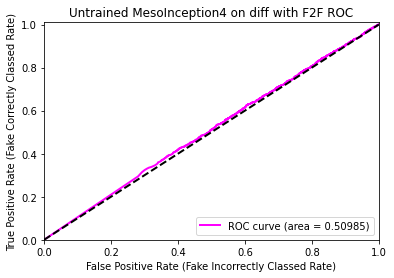

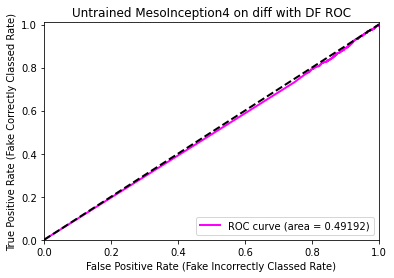

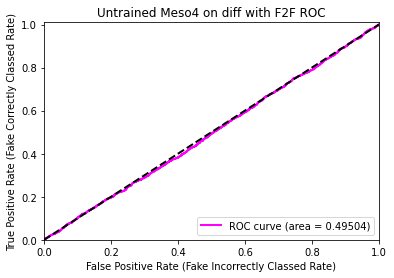

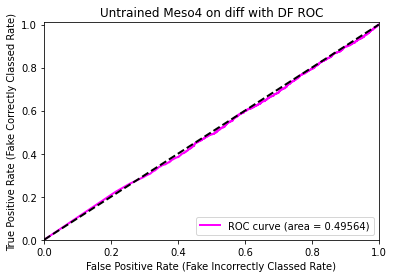

In [3]:
for df_type in ['diff']:
    for baseline in ['MesoInception4', 'Meso4']:
        baseline_name = baseline[:-1] if 'Inception' in baseline else baseline
        for weight_path in [f'./Baseline/weights/{baseline_name}_F2F.h5', f'./Baseline/weights/{baseline_name}_DF.h5']:
            weight_name = weight_path.split('_')[-1].replace('.h5', '')
            print((df_type, baseline, weight_name))
            pipeline.evaluate_model(TEST_MODEL = eval(f'{baseline}().model'),
                                    WEIGHTS_PATH = weight_path,
                                    EXPERIMENT_NAME = f'Untrained {baseline} on {df_type} with {weight_name}',
                                    TEST_DIR = f'./Celeb-DF-v2/Celeb-{df_type}-30-test')